In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [3]:
dominos = pd.read_csv('Dominos_Stock_Data.csv')

In [4]:
dominos.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-10-16,254.89,257.61,253.08,255.96,251.60,525200
1,2019-10-17,256.12,259.96,255.78,256.45,252.09,515100
2,2019-10-18,257.45,258.40,254.23,255.70,251.35,609900
3,2019-10-21,256.61,259.84,255.67,257.52,253.14,499600
4,2019-10-22,257.27,259.47,255.38,258.94,254.53,343100


In [5]:
dominos1 = dominos.reset_index()['Close']

<AxesSubplot:>

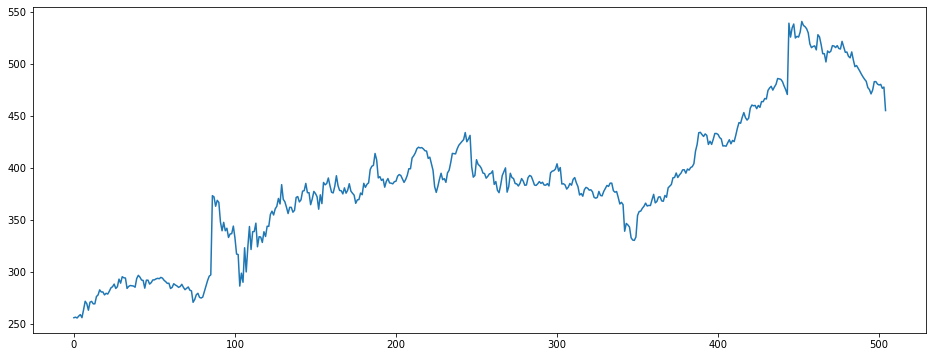

In [8]:
dominos1.plot(figsize=(16,6))

## ....................................................................................................................................

In [10]:
scaler=MinMaxScaler(feature_range=(0,1))
dominos1=scaler.fit_transform(np.array(dominos1).reshape(-1,1))

In [11]:
print(dominos1)

[[9.13017523e-04]
 [2.63370439e-03]
 [0.00000000e+00]
 [6.39112266e-03]
 [1.13776030e-02]
 [1.05348176e-03]
 [2.77416863e-02]
 [5.63612740e-02]
 [4.83196966e-02]
 [2.62668118e-02]
 [5.33764090e-02]
 [5.59047652e-02]
 [4.76173754e-02]
 [4.77227236e-02]
 [7.23741967e-02]
 [7.76767216e-02]
 [9.47431260e-02]
 [8.76496822e-02]
 [8.77550304e-02]
 [7.78874179e-02]
 [8.32250588e-02]
 [8.06264705e-02]
 [9.02833866e-02]
 [1.01520525e-01]
 [1.05488640e-01]
 [1.14267655e-01]
 [9.95540261e-02]
 [1.05558872e-01]
 [1.30982898e-01]
 [1.17428100e-01]
 [1.39164940e-01]
 [1.35547986e-01]
 [1.34670085e-01]
 [9.96944903e-02]
 [1.06401657e-01]
 [1.09456755e-01]
 [1.08403273e-01]
 [1.07700952e-01]
 [1.03732837e-01]
 [1.33160094e-01]
 [1.43800260e-01]
 [1.37760298e-01]
 [1.27998034e-01]
 [1.26593391e-01]
 [1.00502160e-01]
 [1.27471293e-01]
 [1.27471293e-01]
 [1.14373003e-01]
 [1.19183903e-01]
 [1.28314078e-01]
 [1.28559890e-01]
 [1.31860800e-01]
 [1.33721951e-01]
 [1.32387541e-01]
 [1.36847280e-01]
 [1.343189

## .................................................................................................................................

In [12]:
training_size=int(len(dominos1)*0.65)
test_size=len(dominos1)-training_size
train_data,test_data=dominos1[0:training_size,:],dominos1[training_size:len(dominos1),:1]

In [13]:
training_size,test_size

(328, 177)

In [14]:
train_data

array([[0.00091302],
       [0.0026337 ],
       [0.        ],
       [0.00639112],
       [0.0113776 ],
       [0.00105348],
       [0.02774169],
       [0.05636127],
       [0.0483197 ],
       [0.02626681],
       [0.05337641],
       [0.05590477],
       [0.04761738],
       [0.04772272],
       [0.0723742 ],
       [0.07767672],
       [0.09474313],
       [0.08764968],
       [0.08775503],
       [0.07788742],
       [0.08322506],
       [0.08062647],
       [0.09028339],
       [0.10152053],
       [0.10548864],
       [0.11426765],
       [0.09955403],
       [0.10555887],
       [0.1309829 ],
       [0.1174281 ],
       [0.13916494],
       [0.13554799],
       [0.13467008],
       [0.09969449],
       [0.10640166],
       [0.10945675],
       [0.10840327],
       [0.10770095],
       [0.10373284],
       [0.13316009],
       [0.14380026],
       [0.1377603 ],
       [0.12799803],
       [0.12659339],
       [0.10050216],
       [0.12747129],
       [0.12747129],
       [0.114

In [18]:
def new_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [19]:
time_step = 100
X_train, y_train = new_dataset(train_data, time_step)
X_test, ytest = new_dataset(test_data, time_step)

In [21]:
print(X_train.shape)
print('-' * 30)
print(y_train.shape)

(227, 100)
------------------------------
(227,)


In [22]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

## ......................................................................................................................................

In [23]:
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
4/4 [==============================] - 4s 328ms/step - loss: 0.1583 - val_loss: 0.2608
Epoch 2/100
4/4 [==============================] - 0s 109ms/step - loss: 0.0224 - val_loss: 0.0137
Epoch 3/100
4/4 [==============================] - 0s 110ms/step - loss: 0.0200 - val_loss: 0.0470
Epoch 4/100
4/4 [==============================] - 0s 109ms/step - loss: 0.0074 - val_loss: 0.1233
Epoch 5/100
4/4 [==============================] - 0s 120ms/step - loss: 0.0116 - val_loss: 0.0815
Epoch 6/100
4/4 [==============================] - 0s 107ms/step - loss: 0.0038 - val_loss: 0.0262
Epoch 7/100
4/4 [==============================] - 0s 110ms/step - loss: 0.0058 - val_loss: 0.0240
Epoch 8/100
4/4 [==============================] - 0s 108ms/step - loss: 0.0040 - val_loss: 0.0583
Epoch 9/100
4/4 [==============================] - 0s 107ms/step - loss: 0.0037 - val_loss: 0.0747
Epoch 10/100
4/4 [==============================] - 0s 111ms/step - loss: 0.0040 - val_loss: 0.0573
Epoch 11/

4/4 [==============================] - 0s 102ms/step - loss: 0.0023 - val_loss: 0.0223
Epoch 84/100
4/4 [==============================] - 0s 103ms/step - loss: 0.0023 - val_loss: 0.0312
Epoch 85/100
4/4 [==============================] - 0s 100ms/step - loss: 0.0023 - val_loss: 0.0267
Epoch 86/100
4/4 [==============================] - 0s 121ms/step - loss: 0.0024 - val_loss: 0.0268
Epoch 87/100
4/4 [==============================] - 0s 115ms/step - loss: 0.0022 - val_loss: 0.0308
Epoch 88/100
4/4 [==============================] - 0s 107ms/step - loss: 0.0023 - val_loss: 0.0250
Epoch 89/100
4/4 [==============================] - 0s 119ms/step - loss: 0.0022 - val_loss: 0.0310
Epoch 90/100
4/4 [==============================] - 0s 122ms/step - loss: 0.0023 - val_loss: 0.0279
Epoch 91/100
4/4 [==============================] - 0s 111ms/step - loss: 0.0024 - val_loss: 0.0298
Epoch 92/100
4/4 [==============================] - 0s 105ms/step - loss: 0.0023 - val_loss: 0.0338
Epoch 93/100


## .........................................................................................................................................

In [28]:
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

In [29]:
train_pred = scaler.inverse_transform(train_pred)
test_pred = scaler.inverse_transform(test_pred)

In [30]:
math.sqrt(mean_squared_error(y_train,train_pred))

381.20897272434127

In [32]:
look_back=100
trainPredPlot = np.empty_like(dominos1)
trainPredPlot[:, :] = np.nan
trainPredPlot[look_back:len(train_pred)+look_back, :] = train_pred

In [34]:
testPredPlot = np.empty_like(dominos1)
testPredPlot[:, :] = np.nan
testPredPlot[len(train_pred)+(look_back*2)+1:len(dominos1)-1, :] = test_pred

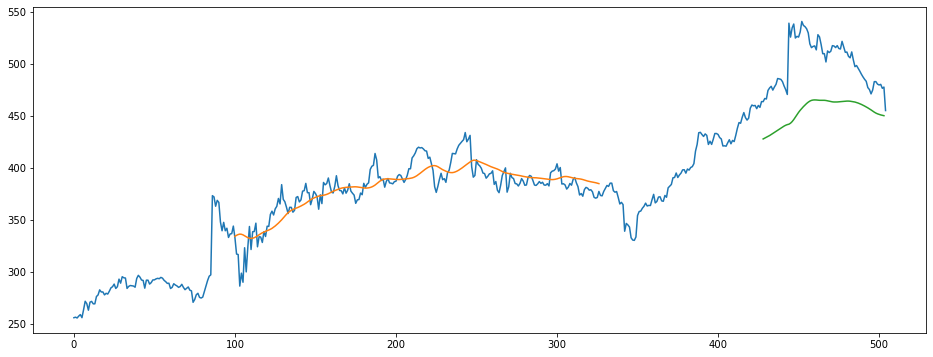

In [40]:
plt.figure(figsize=(16,6))
plt.plot(scaler.inverse_transform(dominos1))
plt.plot(trainPredPlot, label='Training price')
plt.plot(testPredPlot, label='Testing price')
plt.show()

In [41]:
len(test_data)

177

In [42]:
x_input=test_data[77:].reshape(1,-1)
x_input.shape

(1, 100)

In [43]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [44]:
temp_input

[0.5793798504055905,
 0.5908979176177267,
 0.6010815746040665,
 0.5874916599360889,
 0.5987287986796361,
 0.5949362643536891,
 0.6160761316149874,
 0.6398848193278788,
 0.6589879551919093,
 0.656705411384626,
 0.6767917968887172,
 0.6926993714225516,
 0.6758436633072304,
 0.6674158092495699,
 0.6738420479685359,
 0.7075885802577517,
 0.718088281771254,
 0.7155248094953821,
 0.7167889876040312,
 0.7060083576219405,
 0.7167538715454578,
 0.7103276328264916,
 0.7298170453348316,
 0.7295361168662429,
 0.7402113986726131,
 0.7385609439196543,
 0.7674263440671418,
 0.7757488499490817,
 0.7812620711451348,
 0.7685149418829231,
 0.7790848755135724,
 0.7880394704498368,
 0.8075991150753239,
 0.8063349369666748,
 0.8046493661551426,
 0.7970642975032483,
 0.7823506689609159,
 0.7699898163430137,
 0.7538364293991642,
 0.9942058503353586,
 0.9472556800224745,
 0.9784036239772449,
 0.9913614495908978,
 0.9441654668679988,
 0.9497840362397723,
 0.9473961442567687,
 0.9644976647821049,
 1.0,
 0.986691

In [46]:
f_output=[]
n_steps=100
i=0
while(i<30):
    if(len(temp_input)>100):
        x_input = np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose = 0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        f_output.extend(yhat.tolist())
        i = i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose = 0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        f_output.extend(yhat.tolist())
        i = i+1
    
print(lst_output)

0 day input [0.59089792 0.60108157 0.58749166 0.5987288  0.59493626 0.61607613
 0.63988482 0.65898796 0.65670541 0.6767918  0.69269937 0.67584366
 0.66741581 0.67384205 0.70758858 0.71808828 0.71552481 0.71678899
 0.70600836 0.71675387 0.71032763 0.72981705 0.72953612 0.7402114
 0.73856094 0.76742634 0.77574885 0.78126207 0.76851494 0.77908488
 0.78803947 0.80759912 0.80633494 0.80464937 0.7970643  0.78235067
 0.76998982 0.75383643 0.99420585 0.94725568 0.97840362 0.99136145
 0.94416547 0.94978404 0.94739614 0.96449766 1.         0.98669101
 0.98247709 0.97531341 0.96137234 0.92436001 0.91171823 0.91575658
 0.91765284 0.90420339 0.95533237 0.94785265 0.92221793 0.8913158
 0.8913158  0.86343365 0.90051621 0.89507322 0.89956807 0.91846051
 0.91719633 0.91196404 0.91860098 0.9088036  0.90711803 0.93292833
 0.9144924  0.89605647 0.89686414 0.88232609 0.87740984 0.89725041
 0.8703164  0.84756119 0.85138884 0.84215332 0.83263686 0.8222074
 0.8130421  0.80489518 0.79818801 0.77697791 0.770340

11 day output [[0.6241909]]
12 day input [0.66741581 0.67384205 0.70758858 0.71808828 0.71552481 0.71678899
 0.70600836 0.71675387 0.71032763 0.72981705 0.72953612 0.7402114
 0.73856094 0.76742634 0.77574885 0.78126207 0.76851494 0.77908488
 0.78803947 0.80759912 0.80633494 0.80464937 0.7970643  0.78235067
 0.76998982 0.75383643 0.99420585 0.94725568 0.97840362 0.99136145
 0.94416547 0.94978404 0.94739614 0.96449766 1.         0.98669101
 0.98247709 0.97531341 0.96137234 0.92436001 0.91171823 0.91575658
 0.91765284 0.90420339 0.95533237 0.94785265 0.92221793 0.8913158
 0.8913158  0.86343365 0.90051621 0.89507322 0.89956807 0.91846051
 0.91719633 0.91196404 0.91860098 0.9088036  0.90711803 0.93292833
 0.9144924  0.89605647 0.89686414 0.88232609 0.87740984 0.89725041
 0.8703164  0.84756119 0.85138884 0.84215332 0.83263686 0.8222074
 0.8130421  0.80489518 0.79818801 0.77697791 0.77034098 0.7557327
 0.76876075 0.79699407 0.79716965 0.78877691 0.78582716 0.78782877
 0.77459002 0.77880395 0.

23 day output [[0.5870573]]
24 day input [0.73856094 0.76742634 0.77574885 0.78126207 0.76851494 0.77908488
 0.78803947 0.80759912 0.80633494 0.80464937 0.7970643  0.78235067
 0.76998982 0.75383643 0.99420585 0.94725568 0.97840362 0.99136145
 0.94416547 0.94978404 0.94739614 0.96449766 1.         0.98669101
 0.98247709 0.97531341 0.96137234 0.92436001 0.91171823 0.91575658
 0.91765284 0.90420339 0.95533237 0.94785265 0.92221793 0.8913158
 0.8913158  0.86343365 0.90051621 0.89507322 0.89956807 0.91846051
 0.91719633 0.91196404 0.91860098 0.9088036  0.90711803 0.93292833
 0.9144924  0.89605647 0.89686414 0.88232609 0.87740984 0.89725041
 0.8703164  0.84756119 0.85138884 0.84215332 0.83263686 0.8222074
 0.8130421  0.80489518 0.79818801 0.77697791 0.77034098 0.7557327
 0.76876075 0.79699407 0.79716965 0.78877691 0.78582716 0.78782877
 0.77459002 0.77880395 0.699547   0.67892259 0.67570984 0.67156267
 0.66677266 0.6616286  0.6563639  0.65114665 0.64608479 0.64123708
 0.63662839 0.63226044 0

In [47]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [48]:
len(dominos1)

505

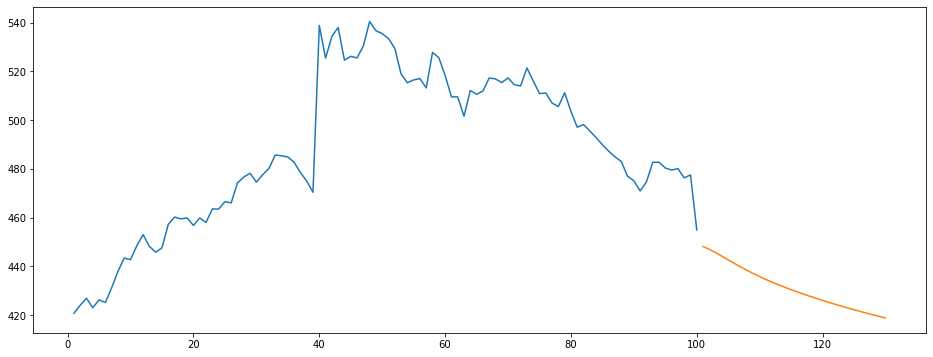

In [53]:
plt.figure(figsize=(16,6))
plt.plot(day_new,scaler.inverse_transform(dominos1[405:]))
plt.plot(day_pred,scaler.inverse_transform(f_output))

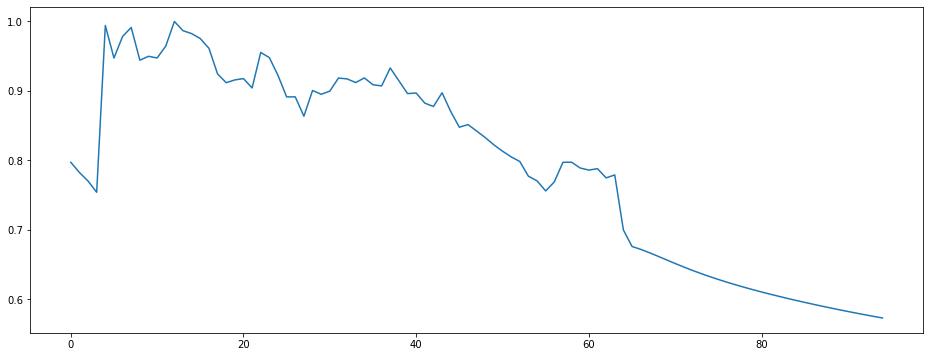

In [54]:
plt.figure(figsize=(16,6))
dom = dominos1.tolist()
dom.extend(f_output)
plt.plot(dom[440:])

In [51]:
dom = scaler.inverse_transform(dom).tolist()

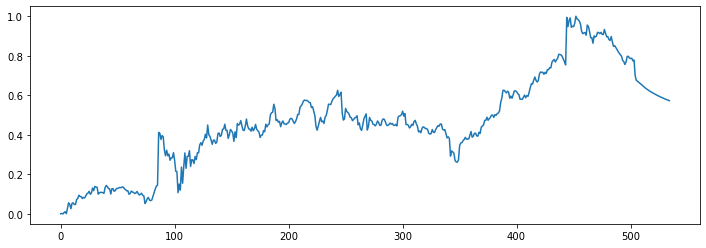

In [58]:
plt.figure(figsize=(12,4))
plt.plot(dom)